# Corrections for Pset 1

# Problem 5

Rice 1.75 (changed so that each individual has either 0, 1 or 2 progeny instead of 0 or 2): A population starts with one member; at a time t = 1, it either has 1 progeny with probability p, 2 progeny with probability 2p, or dies. Also, we know that 3p < 1. If it successfully reproduces, then its children behave independently with the same alternatives at time t = 2. What is the probability that there are no members in the third generation? For what value 1 of p is this probability equal to 0.5? Note: can solve for p numerically; hint: use law of total probability.

<font color='red'>
Let $A_1$ be the event that the first individual has 1 progeny at $t=1$, let $A_2$ be the event that the first individual has 2 progeny at $t=1$, let $A_3$ be the event that the first individual dies with no progeny at $t=1$, and let B be the event that all members of the population die at $t=2$. 
We're asked to solve for $P(B)$. Although we don't know $P(B)$ directly, we can compute the conditional probabilities of B given the various A events. So, use the Law of Total Probability to define $P(B)$ in terms of $P(A_1), P(A_2), P(A_3), P(B|A_1), P(B|A_2)$, and $P(B|A_3)$:

\begin{align*}
P(B) = P(B|A_1)P(A_1) + P(B|A_2)P(A_2) + P(B|A_3)P(A_3) 
\end{align*}


Note that this works since $A_1$, $A_2$ and $A_3$ are disjoint and $A_1 \cup A_2 \cup A_3 = \omega$.
From the problem statement and inspection we know that:



$P(A_1) = p$
$P(A_2) = 2p$
$P(A_3) = 1-P(A_1)-P(A_2) = 1-3p$ (by Property A since $A_3$ is the complement of $A_1 \cup $A_2$)
$P(B|A_3) = 1$ (if the initial individual dies at t=1 then there can be no population at t=2)



To find $P(B|A_1)$, and $P(B|A_2)$, recognize that B requires that all progeny of the first individual die. Since each die with probability $1-3p$ and their deaths are independent, the probability that all die is $1-3p$ if $A_1$ happens and $(1-3p)^2$ if $A_2$ happens. So, $P(B|A_1)=1-3p$ and $P(B|A_2)=(1-3p)^2$.

Combining all of these gives:

\begin{align*}
P(B) &=  P(B|A_1)P(A_1) + P(B|A_2)P(A_2) + P(B|A_3)P(A_3)  \\
	&= (1-3p) p + (1-3p)^2 2p + 1-3p \\
	&= p-3p^2 +2p(1 -6p + 9p^2) + 1-3p \\
	&= p-3p^2 +2p -12p^2 + 18p^3 + 1-3p \\
	&=-15p^2 + 18p^3 + 1 \\	
\end{align*}

We'll numerically compute the value of $p$ such that $P(B) = 0.5$ using the R function polyroot(). Note that if $P(B) = 0.5$, the equation becomes: $18p^3 - 15p^2 + 0.5 = 0$ and we can then solve for the zero that is between 0 and 1:

</font>

In [1]:
(roots = polyroot(c(0.5, 0, -15, 18)))

[1]  0.2113249+0i -0.1666667+0i  0.7886751-0i

<font color='red'>

Although two of these are valid probabilities, only one satisfies the constraint that $3p < 1$.

Could also just find the approximate value of $p$ by computing P(B) for a range of p values between 0 and 1:
</font>

In [2]:
prob.B = function(x) {
return (1-15*x^2 + 18*x^3)
}
p.vals = seq(from=0, to=1, by=0.05)
p.B = sapply(p.vals, function(x) {
return (prob.B(x))
})
names(p.B) = p.vals
p.B

0     0.05      0.1     0.15      0.2     0.25      0.3     0.35 
 1.00000  0.96475  0.86800  0.72325  0.54400  0.34375  0.13600 -0.06575 
     0.4     0.45      0.5     0.55      0.6     0.65      0.7     0.75 
-0.24800 -0.39725 -0.50000 -0.54275 -0.51200 -0.39425 -0.17600  0.15625 
     0.8     0.85      0.9     0.95        1 
 0.61600  1.21675  1.97200  2.89525  4.00000

# Problem 9
* Rice 2.40 (changed so that f(x) = cx(x+2) for 0 ≤ x ≤ 2 and 0 otherwise; also asking to plot the CDF): Suppose X has the density function f(x) = cx(x + 2) for 0 ≤ x ≤ 2 and f(x) = 0 otherwise.
    - a) Find c
    
    - b) Find the CDF
    
    - c) What is P(0.1 ≤ x ≤ 0.5)?
    
    - d) Plot the CDF.

<font color='red'>
a)
\begin{align*}
\int_0^2 cx(x+2) dx &= 1 \\
c \int_0^2 x^2+2x dx &= 1 \\
c[ x^3/3+x^2]^2_0  &= 1 \\
c(8/3+4)  &= 1 \\
c &= 3/20
\end{align*}
</font>



<font color='red'>
b)
\begin{align*}
F_X(x) &= \int_{-\infty}^x f_X(u) du \\
&= \int_{0}^x 3/20(u^2+2u) du & \text{use range of x with non-zero f(x)} \\
&= 3/20 [u^3/3 + u^2]^x_0 \\
&= 3/20 (x^3/3 + x^2)
\end{align*}

The CDF for $x < 0$ is 0 and for $x > 2$ is 1. So, can express the CDF as:
\begin{align*}
F_X(x) = 
\begin{cases}
0 & x < 0 \\
3/20 (x^3/3 + x^2) & 0 \leq x \leq 2 \\
1 & x > 2
\end{cases}
\end{align*}
</font>

    
    
    
<font color='red'>
c)
\begin{align*}
P(0.1 \leq x \leq 0.5) &= F_X(0.5) - F_X(0.1) \\
&= 3/20( 0.5^3/3 + 0.5^2 - 0.1^3/3 - 0.1^2)
\end{align*}
</font>

<font color='red'>
d)
</font>



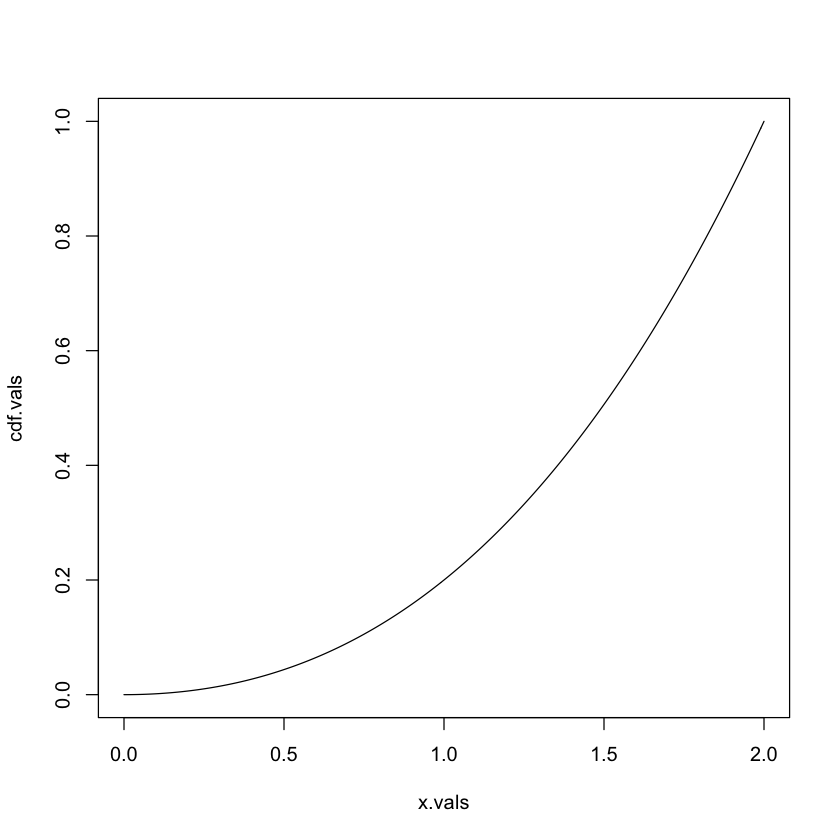

In [3]:
x.vals = seq(from=0, to=2, by=0.01)
cdf.vals = sapply(x.vals, function(x) {
return ((3/20)*(x^3/3 + x^2))
})
plot(x.vals, cdf.vals, type="l")